# University Admission Prediction
Datasets used in this task are from https://www.kaggle.com/mohansacharya/graduate-admissions
## Task 
Using the supplied predictive variables (GRE score, TOEFL score, University Rating, etc) to predict the likelihood of admission of a new candidate aspiring for graduate schools.
## Data
The dataset contains several parameters which are considered important during the application for Masters Programs. 
### Input
<ol>
    <li>GRE Scores (out of 340)</li>
    <li>TOEFL Scores (out of 120)</li>
    <li>University Rating (out of 5)</li>
    <li>Statement of Purpose (out of 5)</li>
    <li>Letter of Recommendation Strength (out of 5)</li>
    <li>Undergraduate GPA (out of 10)</li>
    <li>Research Experience (either 0 or 1)</li>
</ol>

### Output

<ol>
    <li>Chance of Admit (ranging from 0 to 1)</li>
</ol>

## Import Libraries

In [261]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read and Understand Data

In [262]:
data = pd.read_csv("Admission_Predict.csv")

In [263]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [264]:
admission_df = data.drop('Serial No.', axis=1) ### Dropping Serial Number column
admission_df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [265]:
admission_df.describe() ### Understanding the dataset's statistics

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [266]:
admission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [267]:
admission_df.isnull().sum()  ### Checking for any null values

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

## Data Visualization
Seaborn library was used to create various data visualizations like pairplots and correlation martrix
## Plotting Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000230530536A0>,
      dtype=object)

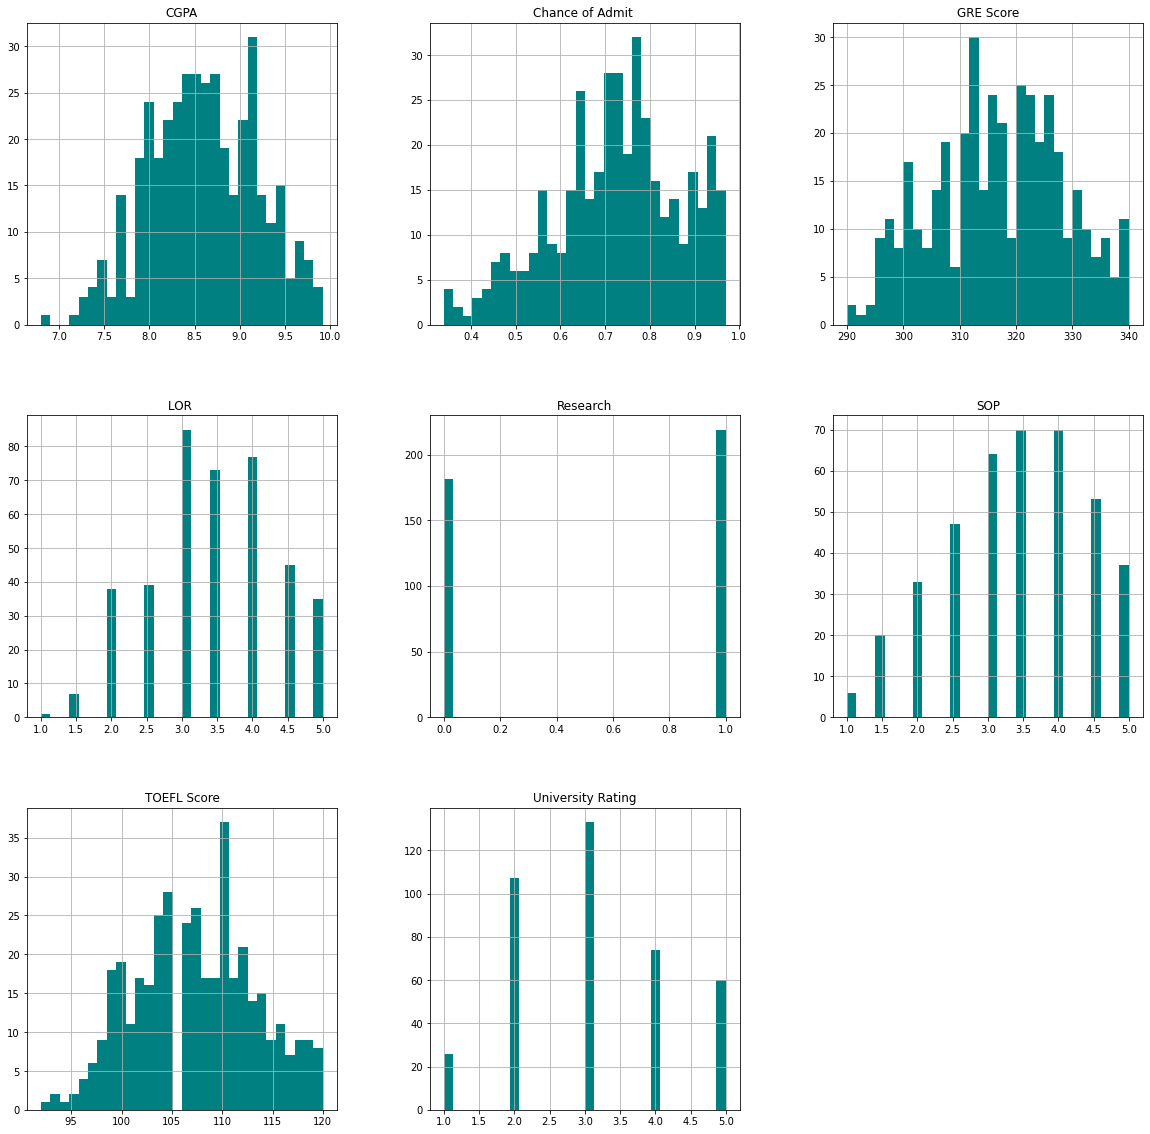

In [268]:
admission_df.hist(bins = 30, figsize = (20,20), color = 'teal')

Histograms allow us to understand data a little better. For instance, it is observed that over 200/400 students had had research experience (1) and about 170/400 students did not have research experience (0). Similarly, it is observed that most students had gotten admission in universities with a rating of 3 (University Rating = 3).

## Pairplot
Pairplots provide with a histogram as well as a scatter plot between two individual features.

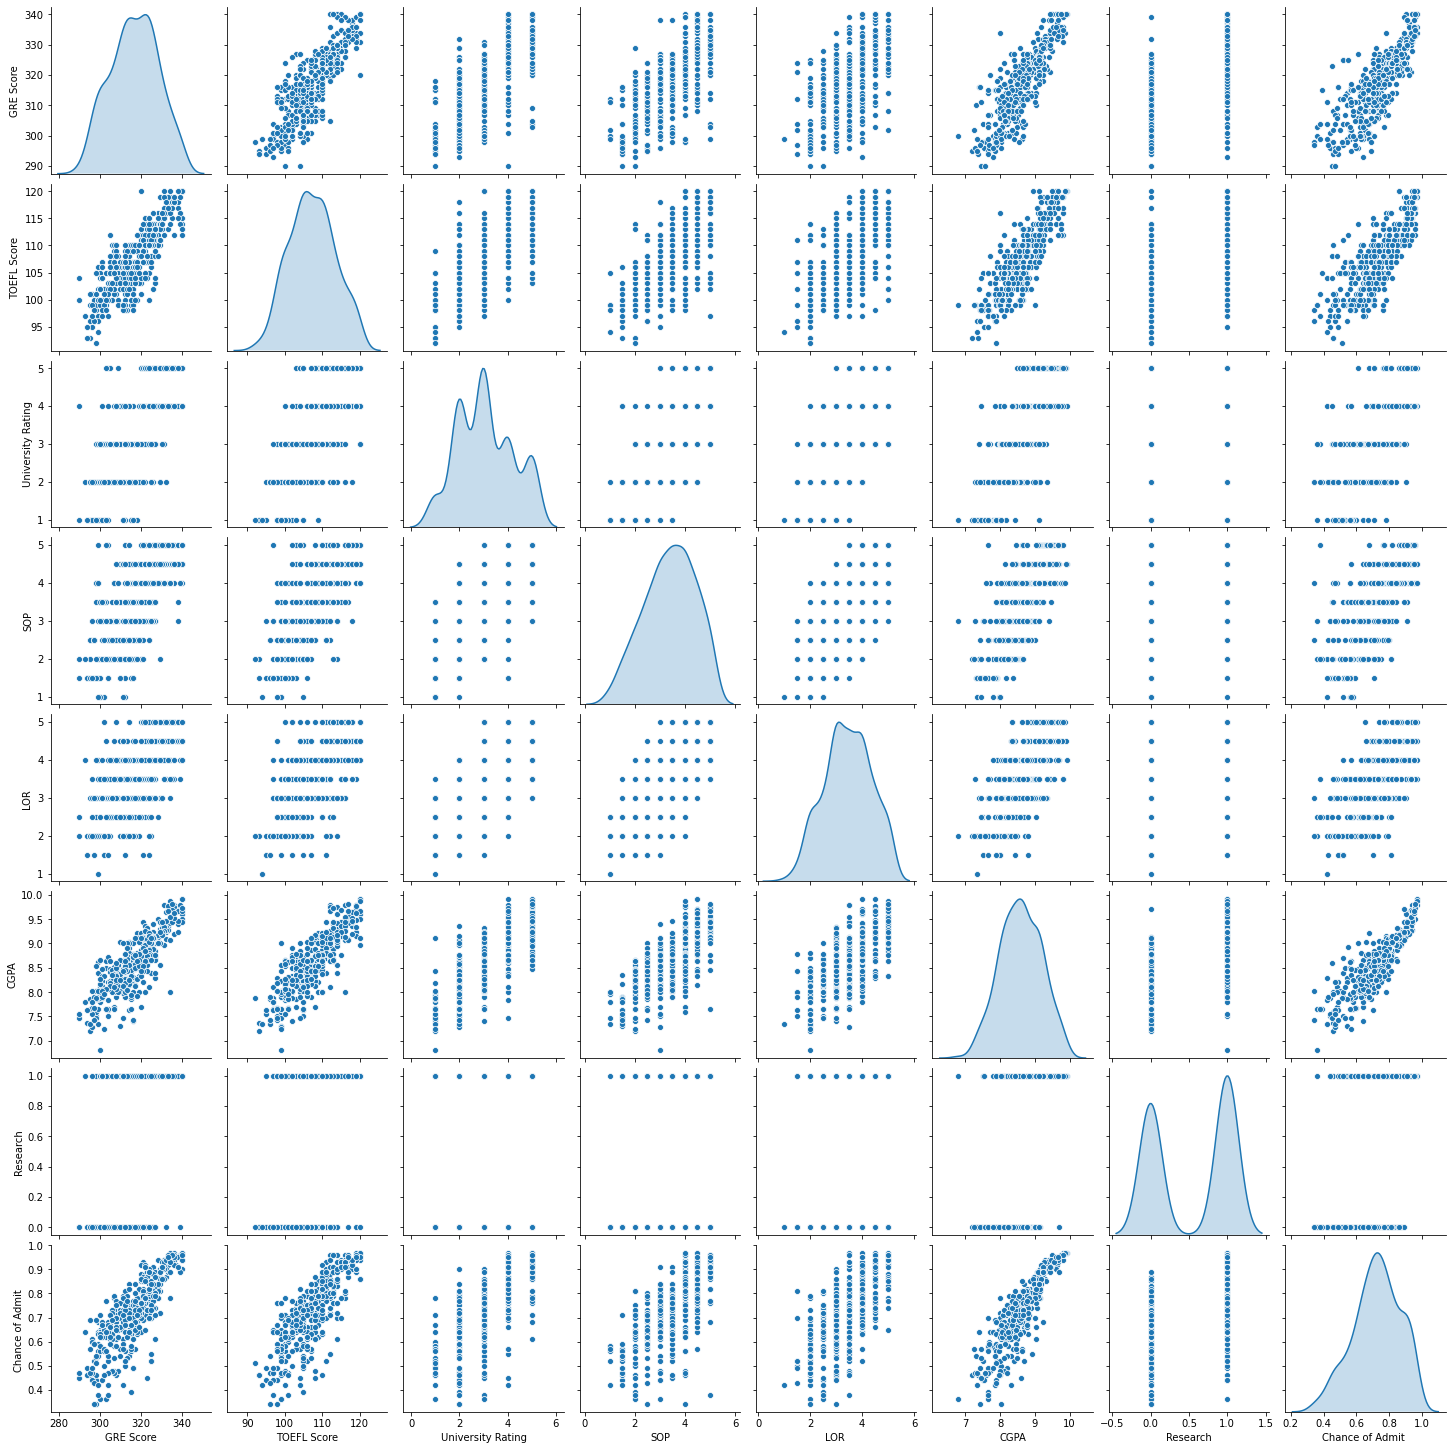

In [269]:
sns.pairplot(admission_df, diag_kind="kde")

The diagonal shows the histogram or distribution of a single feature and the upper and lower triangle shows the relationship between two features. The last row represents plots of features against the chance of admission. It is clear that with higher GRE scores, TOEFL scores, CGPA, and Research experience the chances of admisison also increases, hence, showing a positive correlation.

## Correlation Matrix

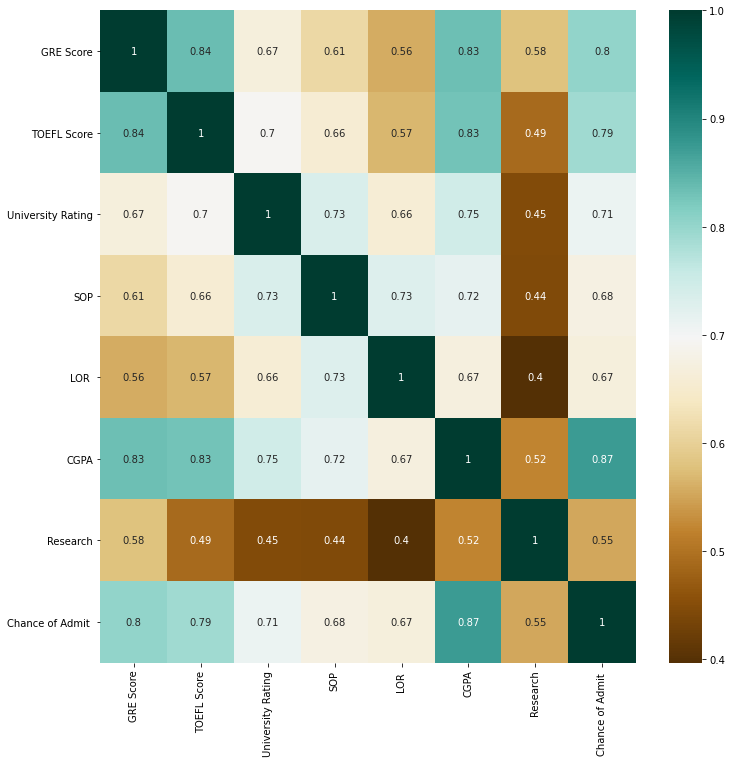

In [270]:
corr_matrix = admission_df.corr()
plt.figure(figsize = (12,12))
sns.heatmap(corr_matrix, annot = True, cmap= "BrBG")
plt.show()
# PuBuGn

This correlation matrix shows that students who had higher GRE Score also had higher CGPA and TOEFL Score. This means that these features are highly correlated to each other.

## Creating Training and Testing Datasets

In [271]:
admission_df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [272]:
X = admission_df.drop(columns =['Chance of Admit '])
y = admission_df['Chance of Admit ']

In [273]:
X = np.array(X)
y = np.array(y)

In [274]:
y = y.reshape(-1,1)
y.shape

(400, 1)

### Scaling Data

In [275]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

In [276]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)

## Training and Evaluating an Aritficial Neural Network

In [277]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

In [278]:
### ANN Model
ANN_model = keras.Sequential()
ANN_model.add(Dense(50, input_dim = 7))
ANN_model.add(Activation('relu'))

ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))

ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))

ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))

ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

ANN_model.compile(optimizer = 'Adam', loss = 'mean_squared_error')

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 50)                400       
_________________________________________________________________
activation_8 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 150)               7650      
_________________________________________________________________
activation_9 (Activation)    (None, 150)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 150)               22650     
_________________________________________________________________
activation_10 (Activation)   (None, 150)              

In [279]:
epochs_hist = ANN_model.fit(X_train, y_train, epochs = 100, batch_size = 20)

Train on 340 samples
Epoch 1/100
340/340 [==============================] - 0s 1ms/sample - loss: 0.5728
Epoch 2/100
340/340 [==============================] - 0s 79us/sample - loss: 0.3884
Epoch 3/100
340/340 [==============================] - 0s 76us/sample - loss: 0.3828
Epoch 4/100
340/340 [==============================] - 0s 79us/sample - loss: 0.3398
Epoch 5/100
340/340 [==============================] - 0s 73us/sample - loss: 0.3149
Epoch 6/100
340/340 [==============================] - 0s 73us/sample - loss: 0.2974
Epoch 7/100
340/340 [==============================] - 0s 73us/sample - loss: 0.2989
Epoch 8/100
340/340 [==============================] - 0s 76us/sample - loss: 0.2632
Epoch 9/100
340/340 [==============================] - 0s 76us/sample - loss: 0.2842
Epoch 10/100
340/340 [==============================] - 0s 73us/sample - loss: 0.2316
Epoch 11/100
340/340 [==============================] - 0s 76us/sample - loss: 0.2585
Epoch 12/100
340/340 [=====================

340/340 [==============================] - 0s 88us/sample - loss: 0.1367
Epoch 96/100
340/340 [==============================] - 0s 76us/sample - loss: 0.1345
Epoch 97/100
340/340 [==============================] - 0s 76us/sample - loss: 0.1317
Epoch 98/100
340/340 [==============================] - 0s 76us/sample - loss: 0.1333
Epoch 99/100
340/340 [==============================] - 0s 76us/sample - loss: 0.1554
Epoch 100/100
340/340 [==============================] - 0s 82us/sample - loss: 0.1334


In [280]:
result = ANN_model.evaluate(X_test, y_test)
ANN_accuracy = 1- result
print("ANN model accuracy: {:.2f} %".format(ANN_accuracy*100))

60/60 [==============================] - 0s 1ms/sample - loss: 0.2731
ANN model accuracy: 72.69 %


In [281]:
epochs_hist.history.keys()

dict_keys(['loss'])

## Plotting ANN Model Loss

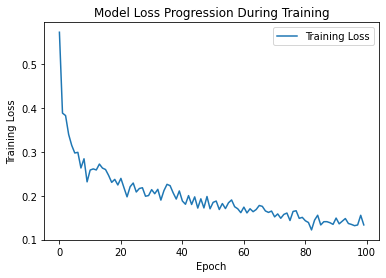

In [282]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progression During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

## Training and Evaluating a Decision Tree Model

In [283]:
###### Decision Tree
from sklearn.tree import DecisionTreeRegressor
DecisionTree_model = DecisionTreeRegressor()
DecisionTree_model.fit(X_train, y_train)

## Accuracy
DecisionTree_accuracy = DecisionTree_model.score(X_test, y_test)
print("Decision Tree model accuracy: {:.2f} %".format(DecisionTree_accuracy*100))

Decision Tree model accuracy: 65.90 %


## Training and Evaluating a Random Forest Model

In [284]:
#### Random Forest
from sklearn.ensemble import RandomForestRegressor
RandomForest_model = RandomForestRegressor()
RandomForest_model.fit(X_train, y_train)

## Accuracy
RandomForest_accuracy = RandomForest_model.score(X_test, y_test)
print("Random Forest model accuracy: {:.2f} %".format(RandomForest_accuracy*100))

C:\Anaconda\envs\tensorflow-sessions\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Random Forest model accuracy: 84.73 %


## Training and Evaluating a Linear Regression Model

In [285]:
### Linear Regressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

LinearRegression_model = LinearRegression()
LinearRegression_model.fit(X_train, y_train)

## Accuracy
LinearRegression_accuracy = LinearRegression_model.score(X_test, y_test)
print("Linear Regression model accuracy: {:.2f} %".format(LinearRegression_accuracy*100))

Linear Regression model accuracy: 84.85 %


The model with the highest accuarcy is considered for further evaluation of the performance scores (KPI)

In [286]:
dict = {ANN_accuracy: 'ANN', DecisionTree_accuracy : 'Decision Tree', RandomForest_accuracy : 'Random Forest', LinearRegression_accuracy : 'Linear Regression'}
print('The model with highest accuarcy is:',dict.get(max(dict)))

The model with highest accuarcy is: Linear Regression


## Regression Model KPIs

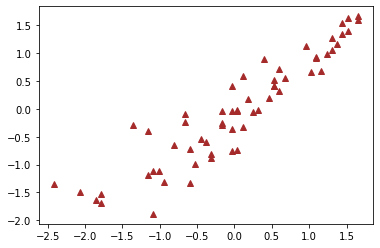

In [292]:
y_predict = LinearRegression_model.predict(X_test)
plt.plot(y_test, y_predict, '^', color = 'brown')

Have to trasform the data back to its original state before it was scaled

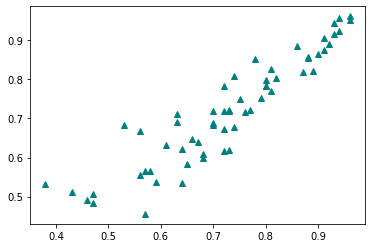

In [293]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)
plt.plot(y_test_orig, y_predict_orig, '^', color = 'teal')

In [289]:
k = X_test.shape[1]
n = len(X_test)

In [290]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)), '.3f'))
MSE  = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_R2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE= ', RMSE, '\nMSE = ', MSE, '\nMAE = ', MAE, '\nR2 = ', r2, '\nAdjusted R2 = ', adj_R2)

RMSE=  0.056 
MSE =  0.003133623969460197 
MAE =  0.041857406100201104 
R2 =  0.8484659094687033 
Adjusted R2 =  0.8280670895894903


## Predicting on New Data

In [291]:
# Model requires 7 input features
student_1 = np.array([340,120,3,3,3,9.8,1], ndmin=2)
student_2 = np.array([300,100,4,3,3,8.5,1], ndmin=2)
student_3 = np.array([290,100,3,4,4,7,0], ndmin=2)

# Using Linear Regression Model to predict on new data
prediction_1 = LinearRegression_model.predict(student_1)
prediction_2 = LinearRegression_model.predict(student_2)
prediction_3 = LinearRegression_model.predict(student_3)

print ("Possibility for student_1 is: {:.2f} %".format(int(prediction_1)))
print ("Possibility for student_2 is: {:.2f} %".format(int(prediction_2)))
print ("Possibility for student_3 is: {:.2f} %".format(int(prediction_3)))

Possibility for student_1 is: 58.00 %
Possibility for student_2 is: 50.00 %
Possibility for student_3 is: 48.00 %
